In [1]:
from repath.experiments.bloodmuc import *
from PIL import Image


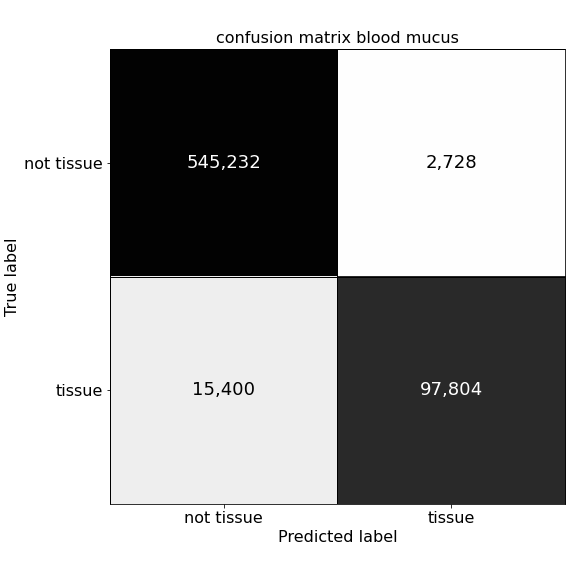

In [2]:
Image.open(experiment_root / 'confusion_matrix_2class.png')

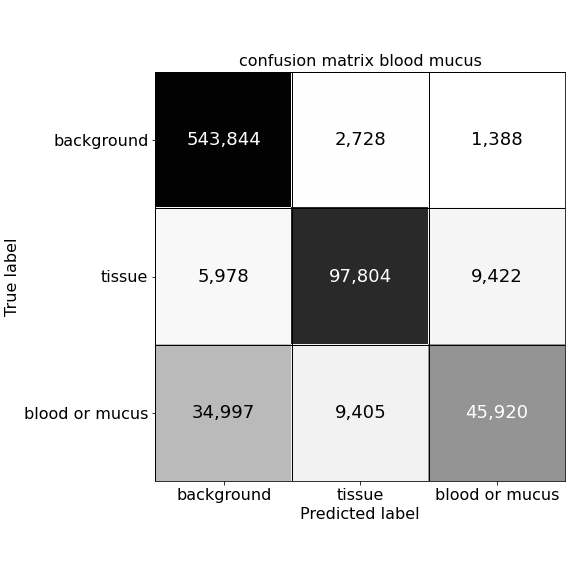

In [3]:
Image.open(experiment_root / 'confusion_matrix_3class.png')

In [4]:
from repath.experiments.bloodmuc_edges import *

In [5]:
#train_classifier()

In [6]:
#predict_images()

In [7]:
from repath.experiments.bloodmuc_lowerlev import *

In [8]:
#train_classifier()

RandomForestClassifier(max_depth=10, max_samples=0.05, n_estimators=50,
                       n_jobs=-1) None
0
1
2
3
4
5


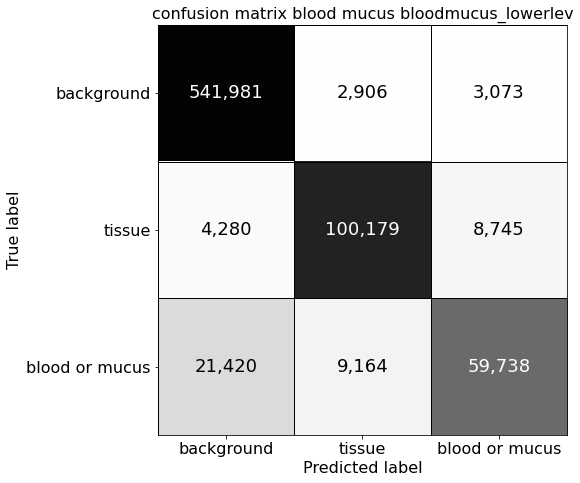

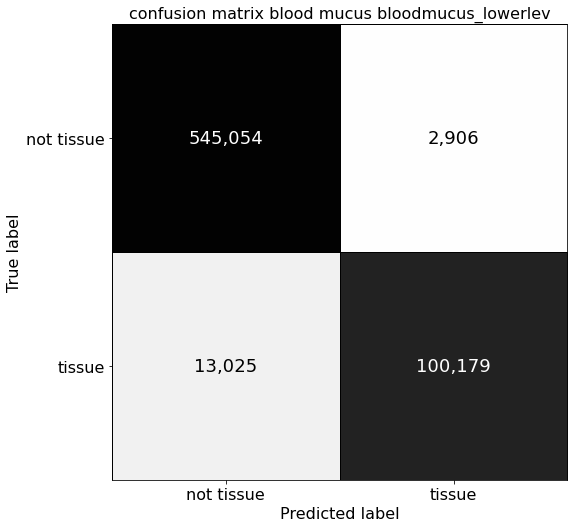

In [9]:
predict_images()

In [10]:
from repath.experiments.bloodmuc_ll_sigma import *

In [11]:
#train_classifier()

In [12]:
#predict_images()

In [13]:
from repath.experiments.bloodmuc_ll_rf import *

In [14]:
train_classifier()

(22364502, 60) (22364502,)
RandomForestClassifier(max_depth=10, max_samples=0.25, n_estimators=50,
                       n_jobs=-1) None
save:  /home/ubuntu/repath/experiments/bloodmucus_ll_rf None


RandomForestClassifier(max_depth=10, max_samples=0.25, n_estimators=50,
                       n_jobs=-1) None
0
1
2
3
4
5


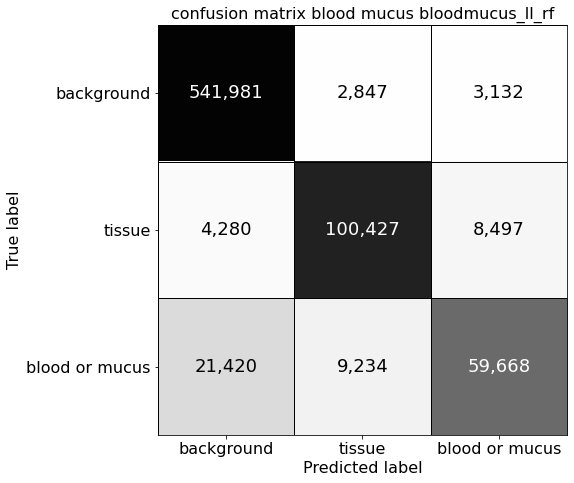

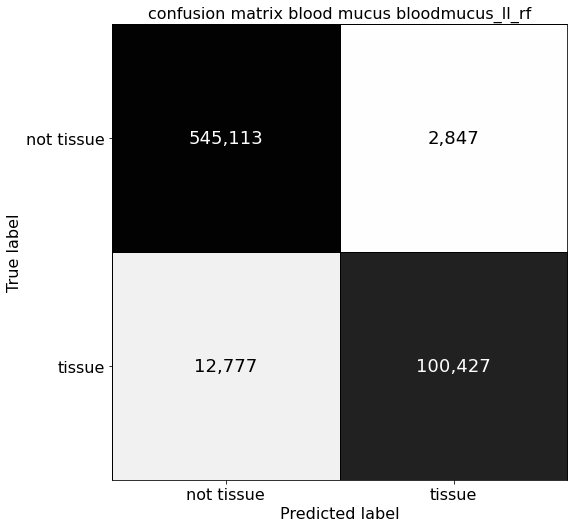

In [15]:
predict_images()

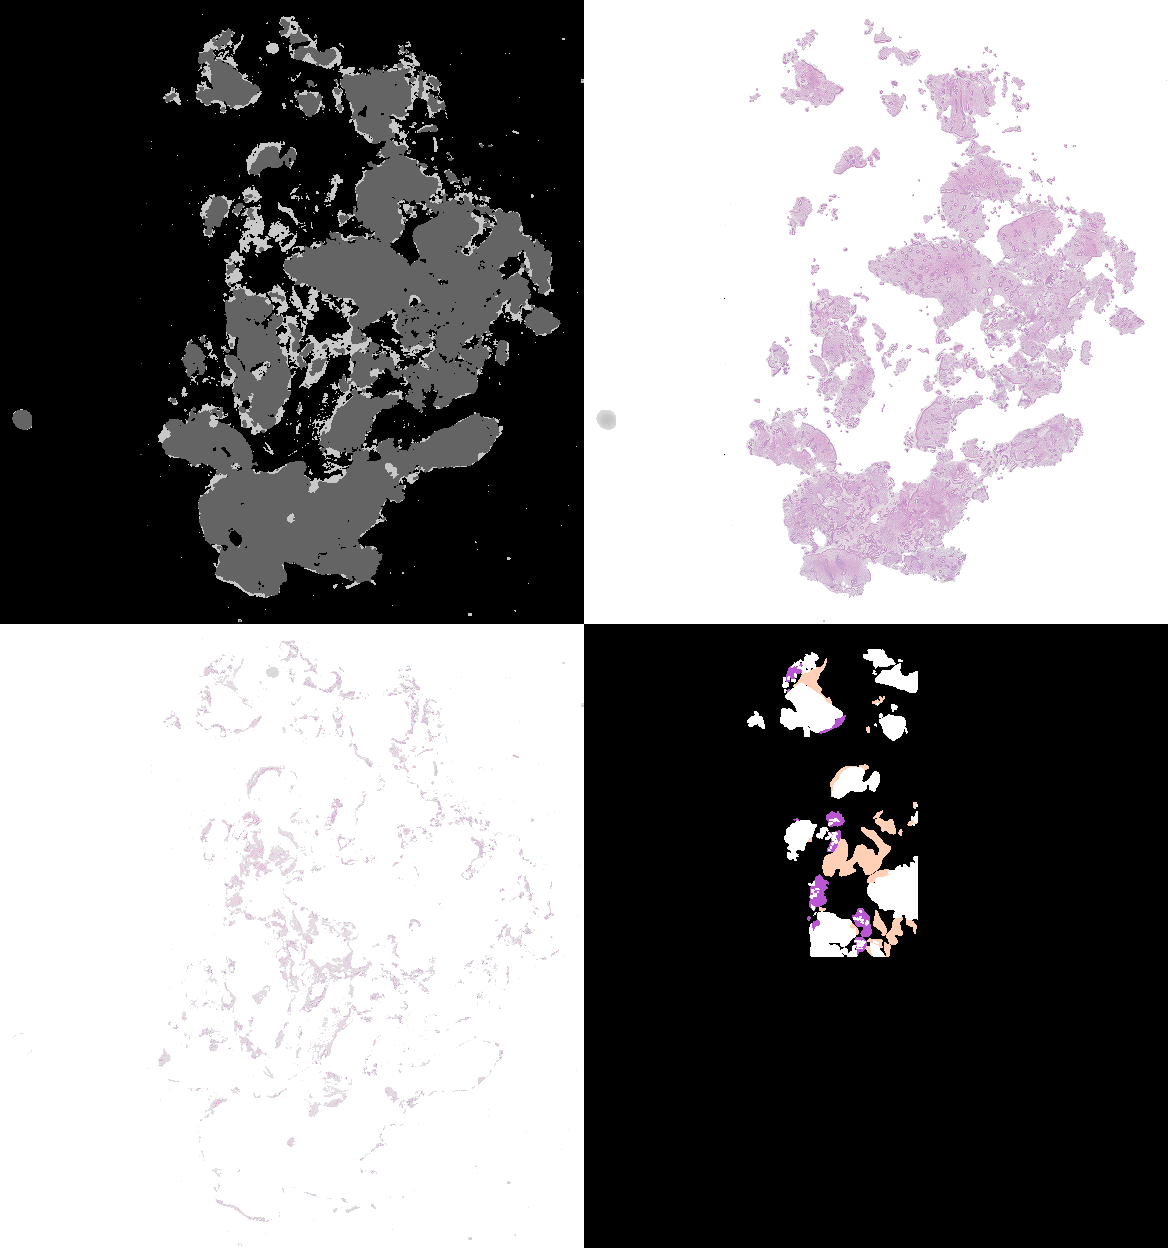

In [17]:
path = '/home/ubuntu/repath/experiments/bloodmucus_ll_rf/mosaic/0.png'

from PIL import Image

Image.open(path)

In [18]:
from repath.data.slides.isyntax import Slide
import repath.data.datasets.bloodmucus as bloodm

dset = bloodm.validation()

slide_path, annot_path, _, _ = dset[0]
with Slide(dset.root / slide_path) as slide:
    thumb = slide.get_thumbnail(7)

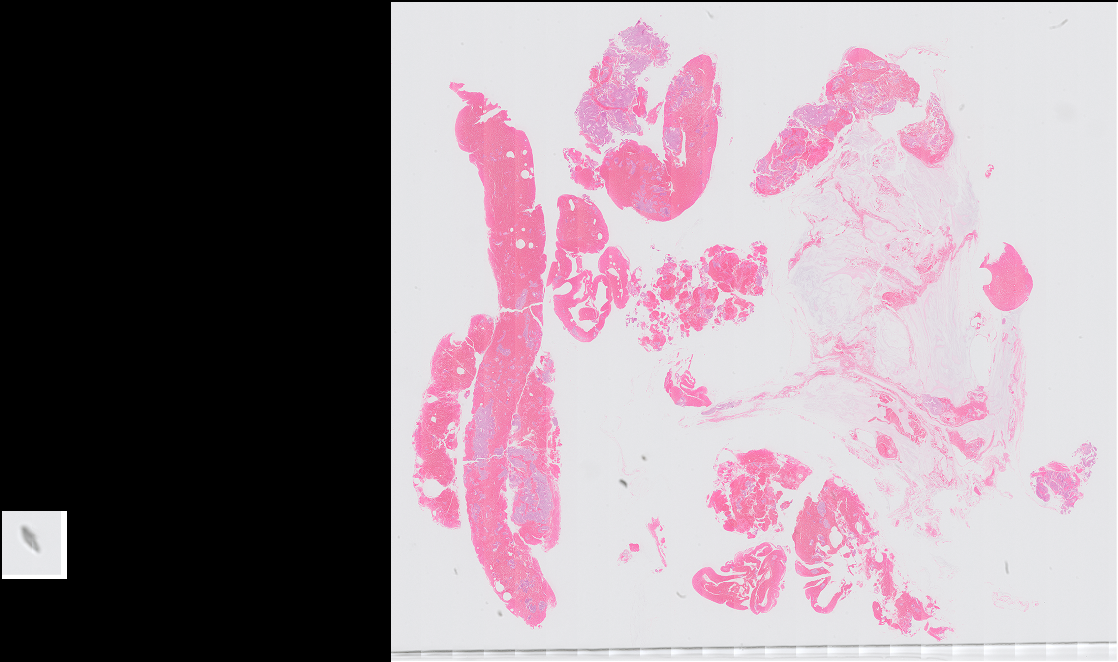

In [20]:
from PIL import Image

Image.fromarray(thumb)

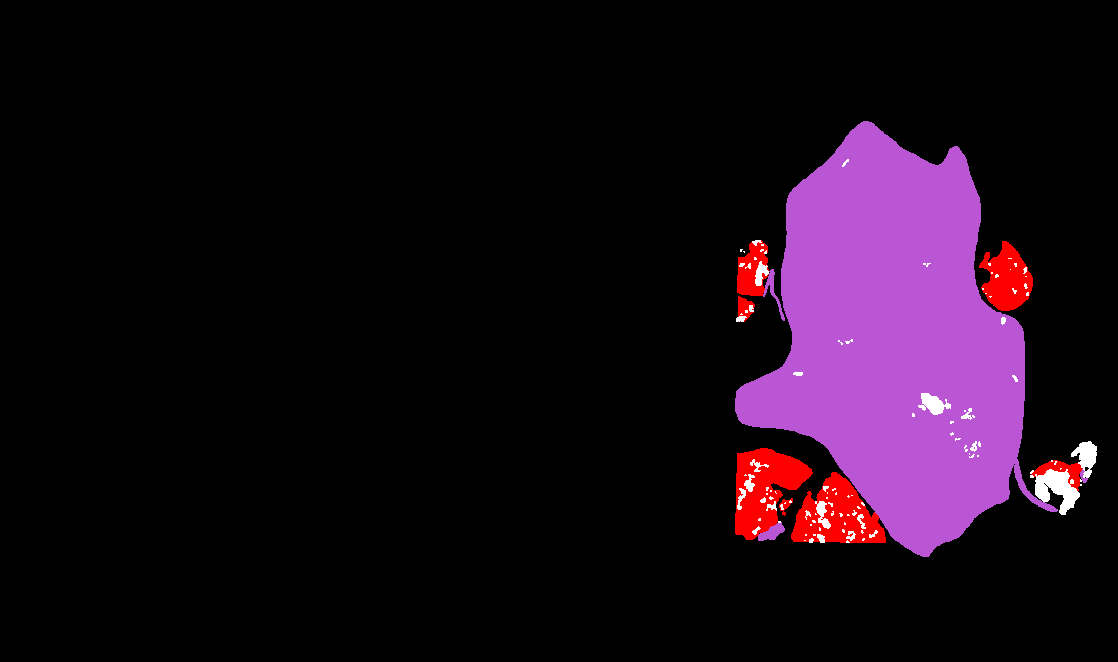

In [24]:
path = '/home/ubuntu/repath/experiments/bloodmucus_ll_rf/annot_out/0.png'

from PIL import Image

annotz = Image.open(path)

annotz

(662, 1118, 3)


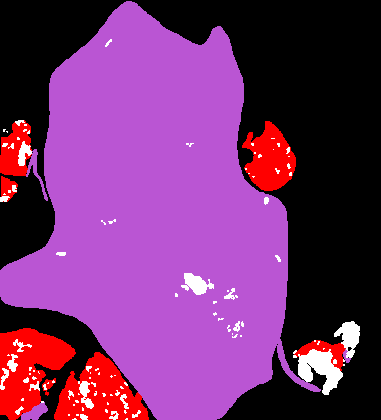

In [42]:
annotz_np = np.asarray(annotz)
print(annotz_np.shape)
annotz_np_cd = annotz_np[120:540, 737:1118, :]
Image.fromarray(annotz_np_cd)

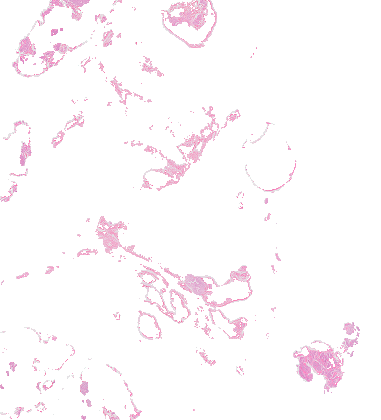

In [37]:
path = '/home/ubuntu/repath/experiments/bloodmucus_ll_rf/tissue/0.png'

from PIL import Image

tissue = Image.open(path)

tissue_np = np.asarray(tissue)
tissue_np_cd = tissue_np[120:540, 737:1118, :]
Image.fromarray(tissue_np_cd)

In [39]:
from repath.preprocess.tissue_detection.blood_mucus import get_annot_areas

annot_areas = get_annot_areas(dset, 5)

len(annot_areas)

6

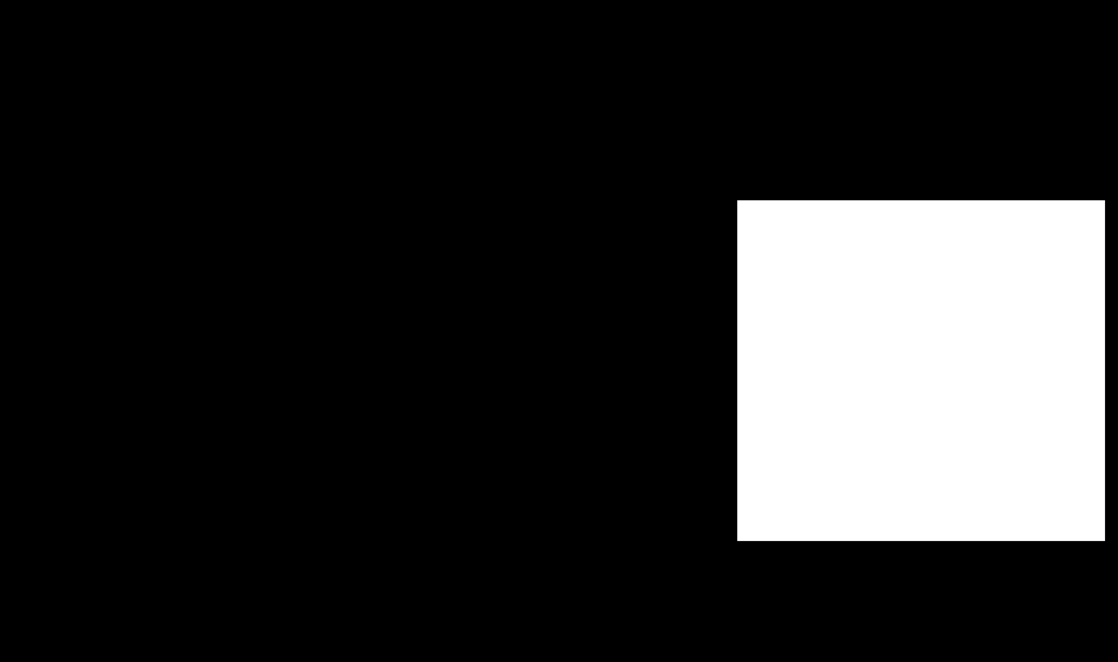

In [49]:
annotarea = np.array(annot_areas[0] == 5, dtype=np.uint8)
annotarea = Image.fromarray(annotarea*255)
annotarea = annotarea.resize((annotz.size))
annotarea

In [55]:
pixvals = np.where(np.asarray(annotarea) > 0)
minrw = min(pixvals[0])
maxrw = max(pixvals[0])+1
mincl = min(pixvals[1])
maxcl = max(pixvals[1])+1

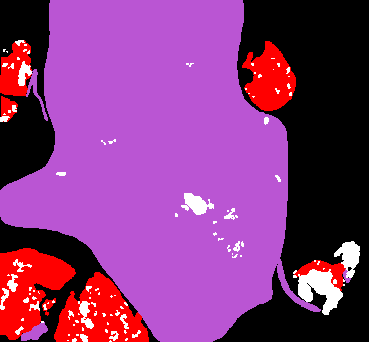

In [56]:
cd_annots = annotz_np[minrw:maxrw, mincl:maxcl, :]
Image.fromarray(cd_annots)

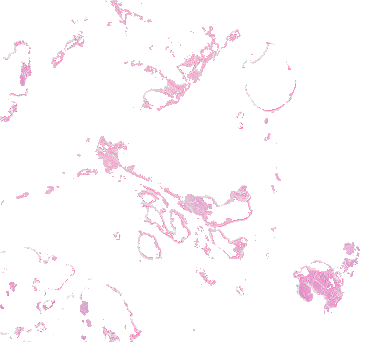

In [54]:
cd_tissue = tissue_np[minrw:maxrw, mincl:maxcl, :]
Image.fromarray(cd_tissue)

(342, 369)


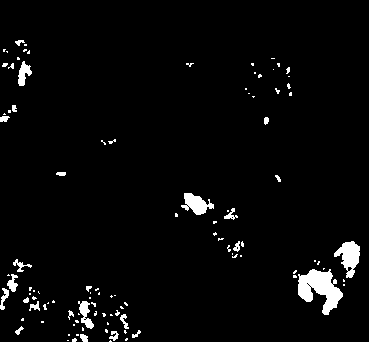

In [81]:
cd_annots_tiss = np.where(np.logical_and(cd_annots[:, :, 0] == 255, cd_annots[:, :, 1] == 255, cd_annots[:, :, 2] == 255), 255, 0)
print(cd_annots_tiss.shape)
Image.fromarray(np.array(cd_annots_tiss, dtype=np.uint8))

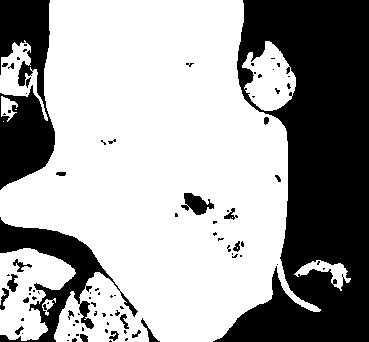

In [104]:
cd_annots_bm = np.where(np.logical_or(cd_annots[:, :, 0] > 0,cd_annots[:, :, 1] > 0, cd_annots[:, :, 2] > 0), 255, 0)
cd_annots_bm = np.subtract(cd_annots_bm, cd_annots_tiss)
Image.fromarray(np.array(cd_annots_bm, dtype=np.uint8))

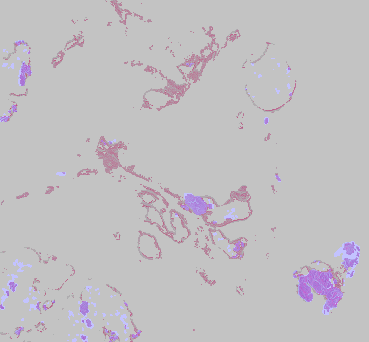

In [90]:
from copy import deepcopy

cd_tissue_annot = deepcopy(cd_tissue)
cd_tissue_annot = Image.fromarray(cd_tissue_annot)

cd_annots_tiss_ed = np.expand_dims(cd_annots_tiss, axis=-1)
cd_annots_blue = np.dstack((np.zeros(cd_annots_tiss_ed.shape),np.zeros(cd_annots_tiss_ed.shape), cd_annots_tiss_ed))
cd_annots_blue = Image.fromarray(np.array(cd_annots_blue, dtype=np.uint8))

mask = Image.new('RGBA',cd_tissue_annot.size,(0,0,0,195))
Image.composite(cd_tissue_annot,cd_annots_blue,mask).convert('RGB')

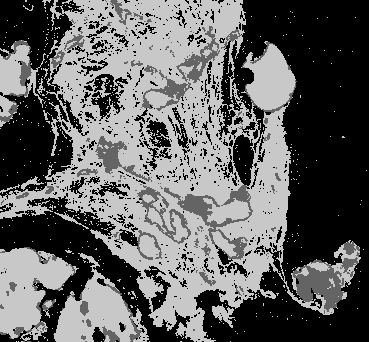

In [95]:
path = '/home/ubuntu/repath/experiments/bloodmucus_ll_rf/labels/0.png'

labels = Image.open(path)
labels_np = np.asarray(labels)
cd_labels = labels_np[minrw:maxrw, mincl:maxcl]
Image.fromarray(cd_labels)

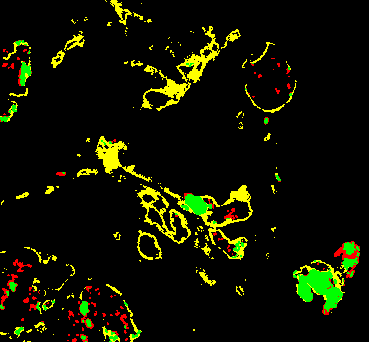

In [109]:
TP = np.logical_and(cd_labels == 100, cd_annots_tiss == 255)
FN = np.logical_and(np.logical_not(cd_labels == 100), cd_annots_tiss == 255)
FP = np.logical_and(cd_labels == 100, np.logical_not(cd_annots_tiss == 255))
tissue_tf = np.zeros((cd_labels.shape[0], cd_labels.shape[1], 3), dtype=np.uint8)
tissue_tf[:, :, 1] = np.where(TP, 255, tissue_tf[:, :, 1])
tissue_tf[:, :, 0] = np.where(FN, 255, tissue_tf[:, :, 0])
tissue_tf[:, :, 0] = np.where(FP, 255, tissue_tf[:, :, 0])
tissue_tf[:, :, 1] = np.where(FP, 255, tissue_tf[:, :, 1])
Image.fromarray(tissue_tf)

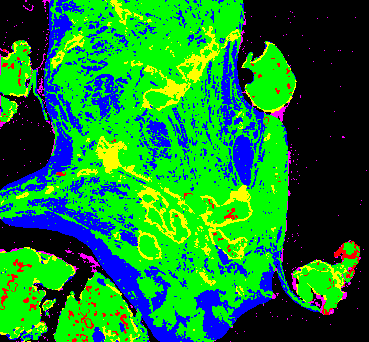

In [176]:
green = np.logical_or(np.logical_and(cd_labels == 200, cd_annots_bm == 255), np.logical_and(cd_labels == 100, cd_annots_tiss == 255))
yellow = np.logical_and(cd_labels == 100, np.logical_not(cd_annots_tiss == 255))
blue = np.logical_and(cd_labels == 0, cd_annots_bm == 255)
red = np.logical_and(np.logical_not(cd_labels == 100), cd_annots_tiss == 255)
cyan = np.logical_and(cd_labels == 200, np.logical_and(cd_annots_bm == 0, cd_annots_tiss == 0))
bloodm_tf = np.zeros((cd_labels.shape[0], cd_labels.shape[1], 3), dtype=np.uint8)
bloodm_tf[:, :, 1] = np.where(green, 255, bloodm_tf[:, :, 1])
bloodm_tf[:, :, 0] = np.where(red, 255, bloodm_tf[:, :, 0])
bloodm_tf[:, :, 0] = np.where(yellow, 255, bloodm_tf[:, :, 0])
bloodm_tf[:, :, 1] = np.where(yellow, 255, bloodm_tf[:, :, 1])
bloodm_tf[:, :, 2] = np.where(blue, 255, bloodm_tf[:, :, 2])
bloodm_tf[:, :, 0] = np.where(cyan, 255, bloodm_tf[:, :, 0])
bloodm_tf[:, :, 2] = np.where(cyan, 255, bloodm_tf[:, :, 2])
Image.fromarray(bloodm_tf)

AssertionError: Unknown annotation group malignant

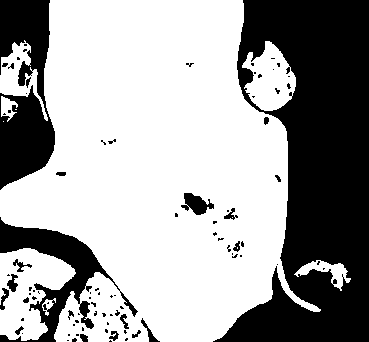

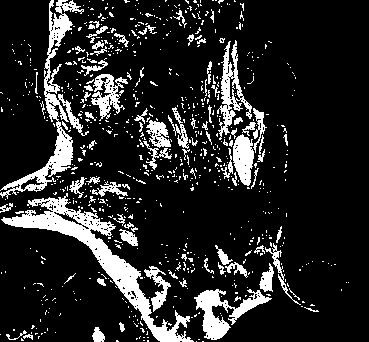

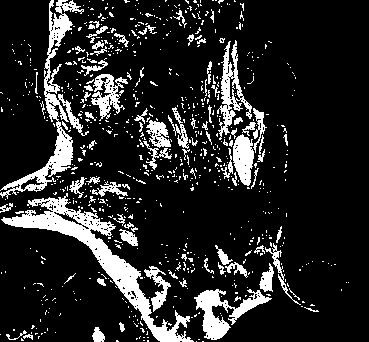